In [1]:
import pandas as pd
import numpy as np
from scipy.stats import entropy
from math import log
from scipy.stats import entropy
from math import log
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
AL30_TRADING=pd.read_csv("/Users/rogarciag/Desktop/AI_&_TRADING/ALGORITHMIC_TRADING/PRINCIPAL/NASINI/TRABAJOS_GENERAL/PROYECTO_TRADING/BASES_DE_DATOS/DATOS_TRADING_SPREADS/DATOS_SIN_CAUSION/spread_trading_AL30_CAUSION_ESTABLE.csv")
AL30_SPREADS=pd.read_csv('/Users/rogarciag/Desktop/AI_&_TRADING/ALGORITHMIC_TRADING/PRINCIPAL/NASINI/TRABAJOS_GENERAL/PROYECTO_TRADING/BASES_DE_DATOS/DATOS_TRADING_SPREADS/DATOS_SIN_CAUSION/ts_rates_spreads_AL30_CAUSION_ESTABLE.csv')

# HURST EXPONENT

In [3]:
def hurst_rescaled_range(data):
    n = len(data)
    mean_data = np.mean(data)
    deviations = data - mean_data
    cumulative_dev = np.cumsum(deviations)
    min_cumulative_dev, max_cumulative_dev = np.min(cumulative_dev), np.max(cumulative_dev)
    R = max_cumulative_dev - min_cumulative_dev
    S = np.std(data)
    return np.log(R / S) / np.log(n)

def rolling_hurst_exp(data, window):
    hurst_exp = np.zeros(len(data))

    for i in range(window, len(data)):
        window_data = data[i - window : i]

        try:
            H = hurst_rescaled_range(window_data)
            hurst_exp[i] = H
        except FloatingPointError:
            hurst_exp[i] = 0.5  # Default value for cases where the computation fails

    return hurst_exp[window:]

In [4]:
x=rolling_hurst_exp(AL30_TRADING["spread"], 100)

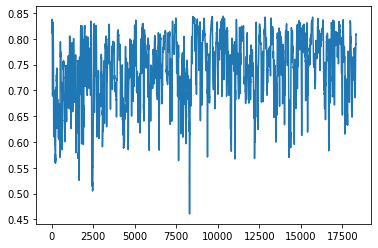

In [5]:
plt.plot(x)

# ENTROPY

<Axes: >

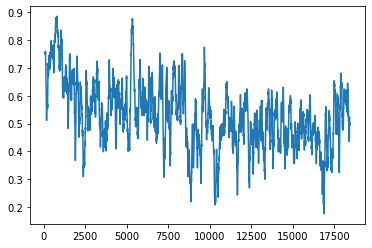

In [27]:
time_series = AL30_TRADING["spread"]

# Define a function to compute entropy
def compute_entropy(series):
    value_counts = series.value_counts()
    probabilities = value_counts / len(series)
    return entropy(probabilities) / log(len(series))  # Normalize the entropy

# Apply the function over a rolling window
window_size = 100
rolling_entropy = time_series.rolling(window_size).apply(compute_entropy, raw=False)
rolling_entropy.plot()

# VARIANCE RATIO TEST

<Axes: >

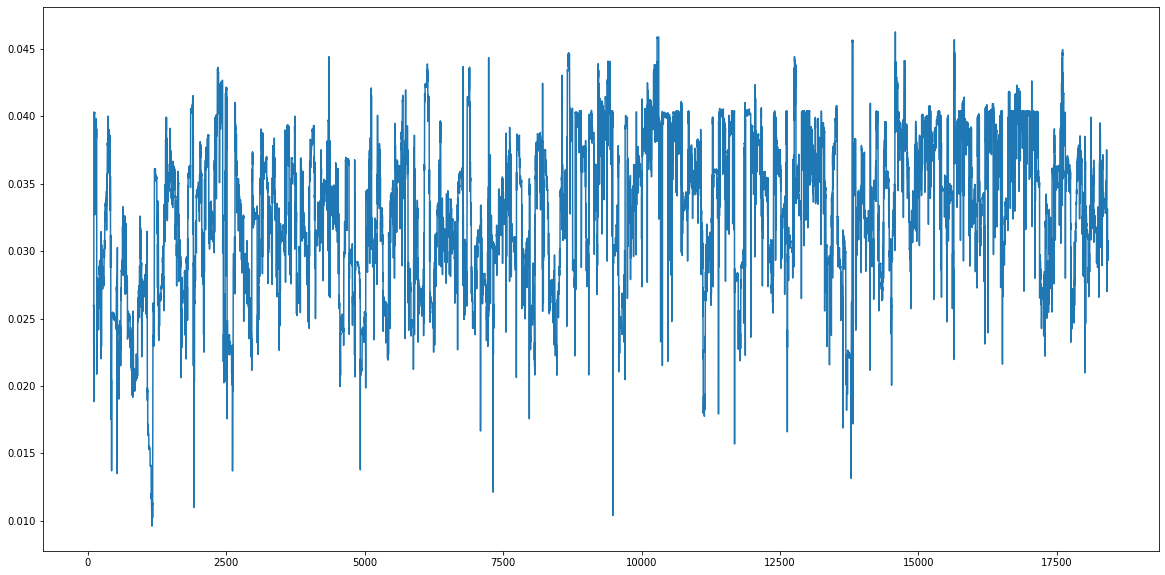

In [28]:
import numpy as np
import pandas as pd
from scipy.stats import norm

def variance_ratio_test(series, lag=4):
    n = len(series)
    mu = series.diff().mean()
    m = ((n - 1) / lag) * np.sum((series.diff().dropna() - mu)**2) 
    y = np.sum(np.square(series.diff(lag).dropna() - lag*mu))
    return y / m

def rolling_variance_ratio_test(series, window, lag=2):
    return series.rolling(window).apply(variance_ratio_test, args=(lag,))

# Example usage
var_ratio_trading= rolling_variance_ratio_test( AL30_TRADING["spread"], window=100)
var_ratio_trading.plot(figsize=(20,10))